In [1]:
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack
import pdb
import numpy as np
import rafias_lib as rl
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Circular

### WLP8SUB

In [11]:
rad_test = ascii.read('rt_sub.csv')
rad_test

norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64
-0.00190767034174,20.0,40.0,60.0,20.0,20.0
0.00632328828745,20.0,40.0,70.0,20.0,30.0
0.00220850135709,20.0,40.0,80.0,20.0,40.0
0.00194438803823,20.0,40.0,90.0,20.0,50.0
0.00186330293409,20.0,40.0,100.0,20.0,60.0
0.00182602067417,20.0,40.0,110.0,20.0,70.0
0.00180571481618,20.0,40.0,120.0,20.0,80.0
0.00179363906264,20.0,40.0,130.0,20.0,90.0
0.001786476118,20.0,40.0,140.0,20.0,100.0


In [7]:
np.argwhere(rad_test['norm_stdev']<0)

array([[ 0],
       [10]])

In [12]:
rad_test.remove_rows([0,10])
rad_test

norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64
0.00632328828745,20.0,40.0,70.0,20.0,30.0
0.00220850135709,20.0,40.0,80.0,20.0,40.0
0.00194438803823,20.0,40.0,90.0,20.0,50.0
0.00186330293409,20.0,40.0,100.0,20.0,60.0
0.00182602067417,20.0,40.0,110.0,20.0,70.0
0.00180571481618,20.0,40.0,120.0,20.0,80.0
0.00179363906264,20.0,40.0,130.0,20.0,90.0
0.001786476118,20.0,40.0,140.0,20.0,100.0
0.00178171083317,20.0,40.0,150.0,20.0,110.0


In [13]:
best_r_ind = np.argmin(rad_test['norm_stdev'])
best_r = rad_test['r_source'][best_r_ind]
best_r

40.0

In [15]:
best_rin_ind = np.argmin(rad_test['norm_stdev'])
best_rin = rad_test['r_in'][best_rin_ind]
best_rin

50.0

In [16]:
best_rout_ind = np.argmin(rad_test['norm_stdev'])
best_rout = rad_test['r_out'][best_rout_ind]
best_rout

70.0

In [38]:
best_combo = [40,50,70]
circ_stdev = np.amin(rad_test['norm_stdev'])
circ_stdev

0.0015593350254666481

# Annular

In [18]:
files_sub = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_481_SE_*/*.slp.fits'))
len(files_sub)

306

In [19]:
centers_sub = rl.gen_center_g2d(166,160,5,400,2,2,0,files_sub)

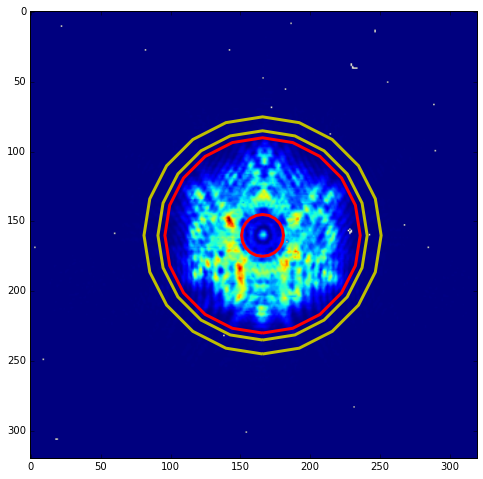

In [34]:
image, time, header, mask = rl.test_image(files_sub[2])
src_ap = rl.photometry(image, centers_sub[1], centers_sub[2], mask, index = 2, shape = 'CircAnn', 
                         r_in = 15, r_out = 70)[1]
bkg_ap = rl.photometry(image, centers_sub[1], centers_sub[2], mask, index = 2, shape = 'CircAnn', 
                         r_in = 75, r_out = 85)[1]
plt.imshow(image)
src_ap.plot(color='r', linewidth = 3)
bkg_ap.plot(color='y', linewidth = 3)

In [22]:
help(rl.time_series)

Help on function time_series in module rafias_lib:

time_series(xcenter, ycenter, filenames, r=None, r_in=None, r_out=None, rs_in=None, rs_out=None, flat_name=False, w=None, h=None, w_in=None, w_out=None, h_out=None, ws_in=None, ws_out=None, hs_out=None, red=False, red2=False, mode='astropy', src_shape='Circ', bkg_shape='Circ', average='med')



In [41]:
flux_table = rl.time_series(centers_sub[1], centers_sub[2], files_sub, r_in = 75, r_out = 85, rs_in = 20, rs_out = 70,
                           src_shape = 'CircAnn', bkg_shape = 'Circ')

In [42]:
ann_stdev = np.std(flux_table['res_flux'])/np.median(flux_table['res_flux'])
ann_stdev

0.0015816093815470618

In [43]:
print "Standard Deviation(Circular Source):", circ_stdev
print "Standard Deviation(Annular Source):", ann_stdev

Standard Deviation(Circular Source): 0.00155933502547
Standard Deviation(Annular Source): 0.00158160938155
